In [49]:
# 匯入必要模組
import pandas as pd # Pandas :處理和分析表格資料 (例如 CSV 或 TSV 檔案) 的強大工具
import matplotlib.pyplot as plt # Matplotlib :繪圖函式庫。其中的 pyplot 模組提供了類似 MATLAB 的繪圖介面，可以創建各種靜態、動態、互動式圖表
from scipy.ndimage import gaussian_filter1d # 從 SciPy 函式庫的 ndimage 子模組中，匯入特定的 gaussian_filter1d 函數，用來執行高斯平滑
import numpy as np # 匯入 NumPy 函式庫

In [50]:
# 整理資料準備等等餵給運算模組
file_path = "cube_Band5a_185.92-187.79GHz-013.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-smoothed-2025-07-10-13-22-16.tsv"

df = pd.read_csv(file_path, sep="\t", skiprows=8) # 用 pandas 函式庫來讀取 TSV 檔案 (df=dataframe)
df.columns = [col.strip().lstrip("#").strip() for col in df.columns] 

# 將 DataFrame 的前兩個欄位轉換為數值型別
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce') # 取得 DataFrame 的第一個欄位的名稱
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce') # 取得 DataFrame 的第二個欄位的名稱
df = df.dropna()  # Pandas 用來將資料轉換為數值型別的函數

x = df[df.columns[0]]
y = df[df.columns[1]]  

#my_lines =[(   , "")] 
# 第一個元素:數值，代表頻率/第二個元素:字串，譜線名

In [51]:
#define binning & boxcar smoothing
def boxcar_smooth(y, kernel_size=3): #定義一個名為 boxcar_smooth 的函數，接收 y:強度值&kernel_size:平滑點數 這兩個數值
    kernel = np.ones(kernel_size)/kernel_size #創建一個稱為 kernel 的平滑核 (smoothing kernel)。
    #首先，np.ones(kernel_size): 創建一個長度為 kernel_size 的 NumPy 陣列，其中所有元素都是 1
    #/ kernel_size :將陣列中的每個元素除以 kernel_size，所以核的總和為 1，而「核」代表了每個點的「權重」
    
    return np.convolve(y, kernel, mode="same") #執行實際的平滑操作
    #np.convolve(): NumPy 中的一個函數，用於執行「一維捲積(1D convolution)」:將一函數與另一函數混合(這裡是y&kernel)

def rebin_spectrum(x, y, bin_size=3):
    x = np.array(x)
    y = np.array(y)
    n_bins = len(y) // bin_size
    x = x[:n_bins * bin_size]
    y = y[:n_bins * bin_size]
    x_binned = x.reshape(n_bins, bin_size).mean(axis=1)
    y_binned = y.reshape(n_bins, bin_size).mean(axis=1)
    return x_binned, y_binned

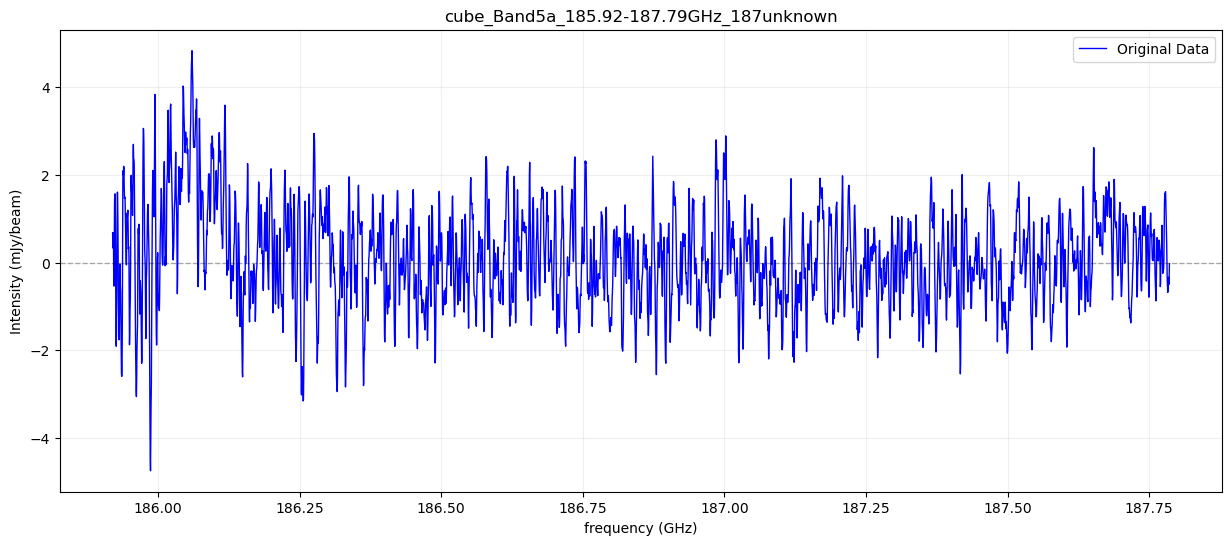

In [ ]:
#original data
plt.figure(figsize=(15, 6))
plt.plot(x, y, label="Original Data", color="blue", linewidth=1)
plt.xlabel("frequency (GHz)")
plt.ylabel("Intensity (mJy/beam)")
#for freq, label in my_lines:
   # plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
   # plt.text(freq, max(y)*0.9, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
#for freq, label in template_lines:
#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)
#    plt.text(freq, max(df[df.columns[1]])*0.9, label, rotation=90, color="blue", fontsize=12, ha='right', va='top')  
plt.title("cube_Band5a_185.92-187.79GHz_187unknown")
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.3)
plt.grid(True, alpha=0.2)
plt.legend()
plt.show() #在ipy其實不用，但在py要，所以還是嚴謹一點

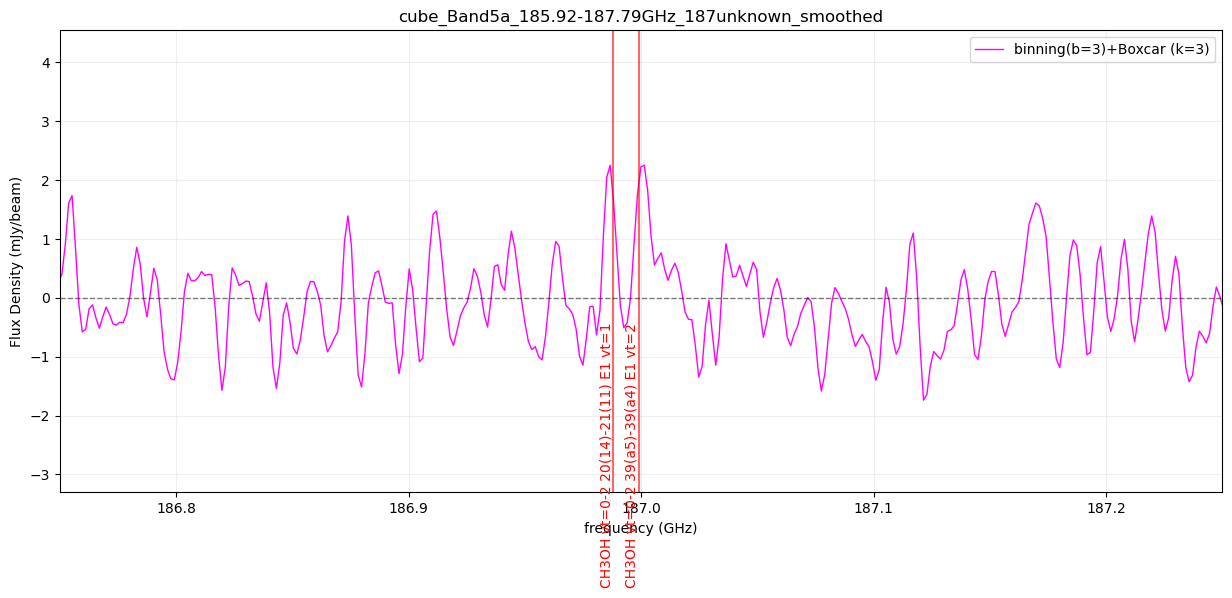

In [53]:
x_binned, y_binned = rebin_spectrum(x, y, bin_size=3)
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=3)
plt.figure(figsize=(15, 6))
plt.plot(x_binned, y_binned_boxcar, color="magenta", linewidth=1, label="binning(b=3)+Boxcar (k=3)")

my_lines = [
    (186.988, "CH3OH vt=0-2 20(14)-21(11) E1 vt=1"), #記得加上逗號來分隔列表中的元素們阿!
    (186.999, "CH3OH vt=0-2 39(a5)-39(a4) E1 vt=2")
]
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_binned_boxcar)*-0.1, label, rotation=90, color="red", fontsize=10, ha='right', va='top')

plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("cube_Band5a_185.92-187.79GHz_187unknown_smoothed")
plt.xlim(186.75,187.25)
#plt.ylim(    ,     ) 感覺是不需要啦
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.5)
plt.grid(True, alpha=0.2)
plt.legend() 

In [ ]:
'''
#if you need to binning + boxcar smoothing

x_binned, y_binned = rebin_spectrum(x, y, bin_size=    )
y_binned_boxcar = boxcar_smooth(y_binned, kernel_size=    )

plt.figure(figsize=(8, 4))
plt.plot(x_binned, y_binned_boxcar, color="black", linewidth=1, label="binning(b=    )+Boxcar (k=    )")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_binned_boxcar)*-0.1, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
#for freq, label in template_lines:
#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)
#    plt.text(freq, max(df[df.columns[1]])*-0.1, label, rotation=90, color="blue", fontsize=10, ha='right', va='top')  
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("    ")
plt.xlim(    ,     )
#plt.ylim(    ,     )
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.2)
plt.legend()

'''

'''
#if you just need boxcar smoothing

y_boxcar = boxcar_smooth(y, kernel_size= )

plt.figure(figsize=(8, 4))
plt.plot(x, y_boxcar, color="black", linewidth=1, label="Boxcar (k=    )")
for freq, label in my_lines:
    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)
    plt.text(freq, max(y_boxcar)*-0.1, label, rotation=90, color="red", fontsize=10, ha='right', va='top')
#for freq, label in template_lines:
#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)
#    plt.text(freq, max(df[df.columns[1]])*-0.1, label, rotation=90, color="blue", fontsize=10, ha='right', va='top')  
plt.xlabel("frequency (GHz)")
plt.ylabel("Flux Density (mJy/beam)")
plt.title("    ")
#plt.xlim(    ,     )
#plt.ylim(    ,     )
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.2)
plt.legend()
test
'''

'\n#if you just need boxcar smoothing\n\ny_boxcar = boxcar_smooth(y, kernel_size= )\n\nplt.figure(figsize=(8, 4))\nplt.plot(x, y_boxcar, color="black", linewidth=1, label="Boxcar (k=    )")\nfor freq, label in my_lines:\n    plt.axvline(freq, color="red", linestyle="-", alpha=0.6)\n    plt.text(freq, max(y_boxcar)*-0.1, label, rotation=90, color="red", fontsize=10, ha=\'right\', va=\'top\')\n#for freq, label in template_lines:\n#    plt.axvline(freq, color="blue", linestyle="-", alpha=0.6)\n#    plt.text(freq, max(df[df.columns[1]])*-0.1, label, rotation=90, color="blue", fontsize=10, ha=\'right\', va=\'top\')  \nplt.xlabel("frequency (GHz)")\nplt.ylabel("Flux Density (mJy/beam)")\nplt.title("    ")\n#plt.xlim(    ,     )\n#plt.ylim(    ,     )\nplt.axhline(0, color="black", linewidth=1, linestyle="--")\nplt.grid(True, alpha=0.2)\nplt.legend()\n'